# Imports

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer

## Helper Functions

In [134]:
def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
#     %config InlineBackend.figure_format = 'retina'

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [15, 7]
    plt.rcParams['font.size'] = 24

    # display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
#   pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    sns.set()
    
jupyter_settings()

## Load Dataset

In [135]:
df_raw = pd.read_csv(r'../data/raw/ecommerce.csv')

In [136]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [137]:
# drop 'unnamed: 8' column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis =1)

# Data Description

In [138]:
df1 = df_raw.copy()

## Rename Columns

In [139]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [140]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df1.columns = cols_new
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Data Dimensions

In [141]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## Data Types

In [142]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [143]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Check NA

In [144]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [145]:
# c0.1 - remove NA
df1 = df1.dropna(subset=['description','customer_id'])
print ('Removed data: {:.2f}'.format(1 - df1.shape[0]/df_raw.shape[0]))

Removed data: 0.25


In [146]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change dtypes

In [147]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [148]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [149]:
# changing 'invoice_date'
df1['invoice_date'] = pd.to_datetime (df1['invoice_date'], format='%d-%b-%y')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [150]:
# changing 'customer_id'
df1['customer_id'] = df1['customer_id'].astype(int)

In [151]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## Descriptive Statistics

# Feature Engineering

In [152]:
df2 = df1.copy()

## Feature Creation

In [153]:
# data reference
df_ref = df2.drop (['invoice_no','stock_code','description','quantity','invoice_date','unit_price','country'],
                   axis=1).drop_duplicates(ignore_index=True)
print('Data reference shape:', df_ref.shape)
df_ref.head()

Data reference shape: (4372, 1)


,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [154]:
# === MONETARY 

# creating 'gross revenue' (= quantity*price)
df2['gross_revenue'] = df2['quantity']*df2['unit_price']

# creating 'monetary'
df_monetary = df2[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

# merging dataframes
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
dtype: int64 


Data reference shape: (4372, 2)


,customer_id,gross_revenue
0,17850,5288.63
1,13047,3079.10
2,12583,7187.34
3,13748,948.25
4,15100,635.10


In [155]:
# === RECENCY (last day of purchase)
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency ['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days # dt vectorize the series to apply 'days' command
df_recency = df_recency[['customer_id','recency_days']].copy()

# merging dataframes
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
recency_days     0
dtype: int64 


Data reference shape: (4372, 3)


,customer_id,gross_revenue,recency_days
0,17850,5288.63,302
1,13047,3079.10,31
2,12583,7187.34,2
3,13748,948.25,95
4,15100,635.10,330


In [156]:
# === FREQUENCY (purchase periodicity)
df_freq = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq = df_freq.rename(columns={'customer_id': 'customer_id','invoice_no': 'invoice_freq'}) # changing columns names

# merging dataframes
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
recency_days     0
invoice_freq     0
dtype: int64 


Data reference shape: (4372, 4)


,customer_id,gross_revenue,recency_days,invoice_freq
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


In [157]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_freq
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# Variable Filtering

In [158]:
df3 = df_ref.copy()

# EDA (Exploratory Data Analysis)

In [159]:
df4 = df3.copy()

# Data Preparation

In [160]:
df5 = df4.copy()

# Feature Selection

In [161]:
df6 = df5.copy()

# Hypermarameter Fine-Tunning

In [162]:
X =df6.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_freq
0,5288.63,302,35
1,3079.10,31,18
2,7187.34,2,18
3,948.25,95,5
4,635.10,330,6


In [163]:
clusters = [2,3,4,5,6]

## Within-Cluster Sum of Square (WSS)

[100161464120.90105, 52830442008.00694, 39986557693.70822, 22956270440.126106, 19974463394.768677]


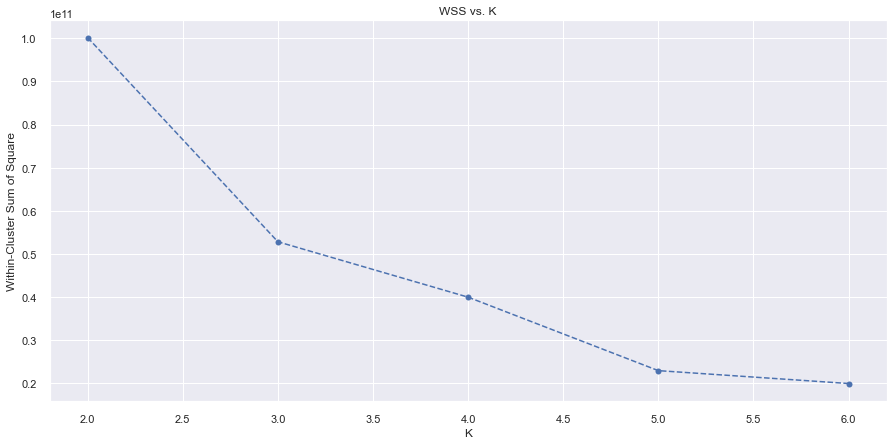

In [164]:
wss = []

for k in clusters:
    # model definition
    kmeans = c.KMeans (init='random', 
                       n_clusters=k, 
                       n_init=10, #init random inicia o centroide aleatoriamente, n_init 
                       max_iter = 300, 
                       random_state =42) # random state define um estado aleatório fixo
    
    # model training
    kmeans.fit( X )
    
    # validation
    wss.append(kmeans.inertia_) # generates a wss value for each k
    
# wss plot - elbow method
plt.plot (clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs. K')

print(wss)

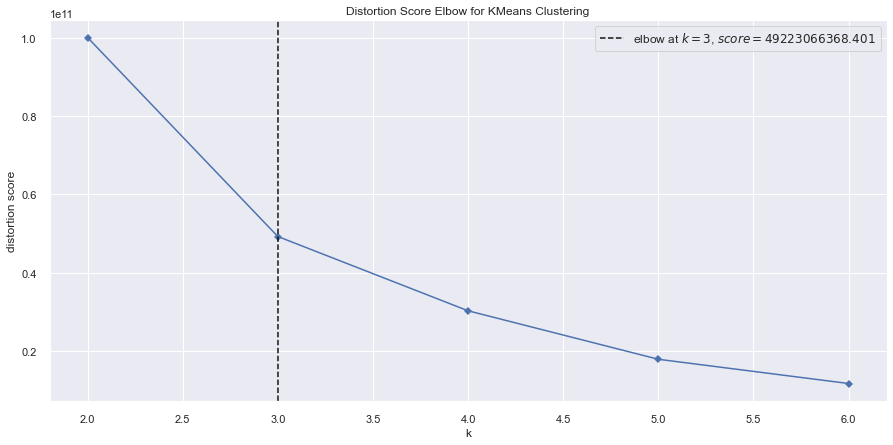

In [167]:
# yellow brick

kmeans_y= KElbowVisualizer(c.KMeans(), k=clusters, timings=False);
kmeans_y.fit(X);
kmeans_y.show();
























In [120]:
wss

[100161464120.90105,
 52830442008.00694,
 39986557693.70822,
 22956270440.126106,
 19974463394.768677]

## Silhoute Score

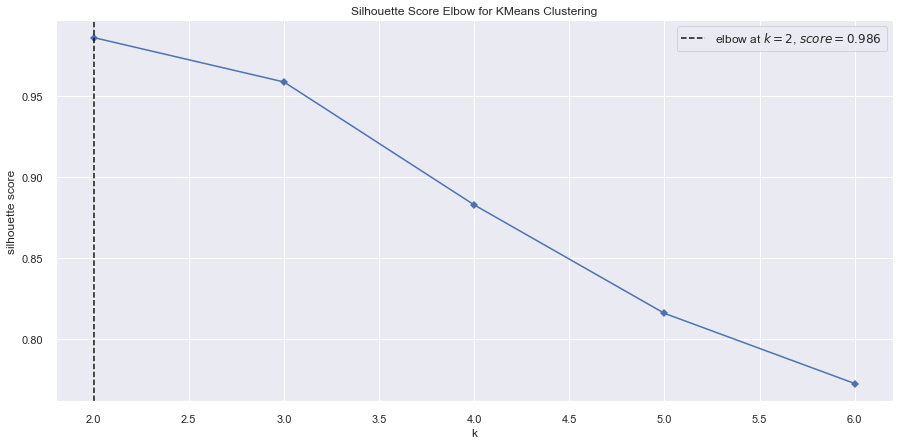

In [169]:
# yellow brick

kmeans_y= KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False);
kmeans_y.fit(X);
kmeans_y.show();


# Model training

# Cluster Analysis

# Deploy to Production